## Introduction
The Images API provides three methods for interacting with images:

1. Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
2. Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
3. Creating variations of an existing image (DALL·E 2 only)

This guide covers the basics of using these three API endpoints with useful code samples. To try DALL·E 3, head to ChatGPT. To try DALL·E 2, check out the DALL·E preview app.

In [1]:

from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
_ : bool = load_dotenv(find_dotenv()) # 

client: OpenAI = OpenAI()

file_name:str = "image.png"

response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese dog playing the violen",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url:str = response.data[0].url

print(image_url)
# save image to file


https://oaidalleapiprodscus.blob.core.windows.net/private/org-8wCsPVtFXXzbjLhMN4iOM3nw/user-7rxSAVZ9rGGFwvm2pvbI6v40/img-3z2vYivEbs6CECQ7vgqpONUE.png?st=2025-07-09T15%3A03%3A31Z&se=2025-07-09T17%3A03%3A31Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=475fd488-6c59-44a5-9aa9-31c4db451bea&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-07-09T10%3A30%3A03Z&ske=2025-07-10T10%3A30%3A03Z&sks=b&skv=2024-08-04&sig=fd/YOwHka8jKpuPr4w8po7WE4x0OLTCTxifn2eQ6RNs%3D


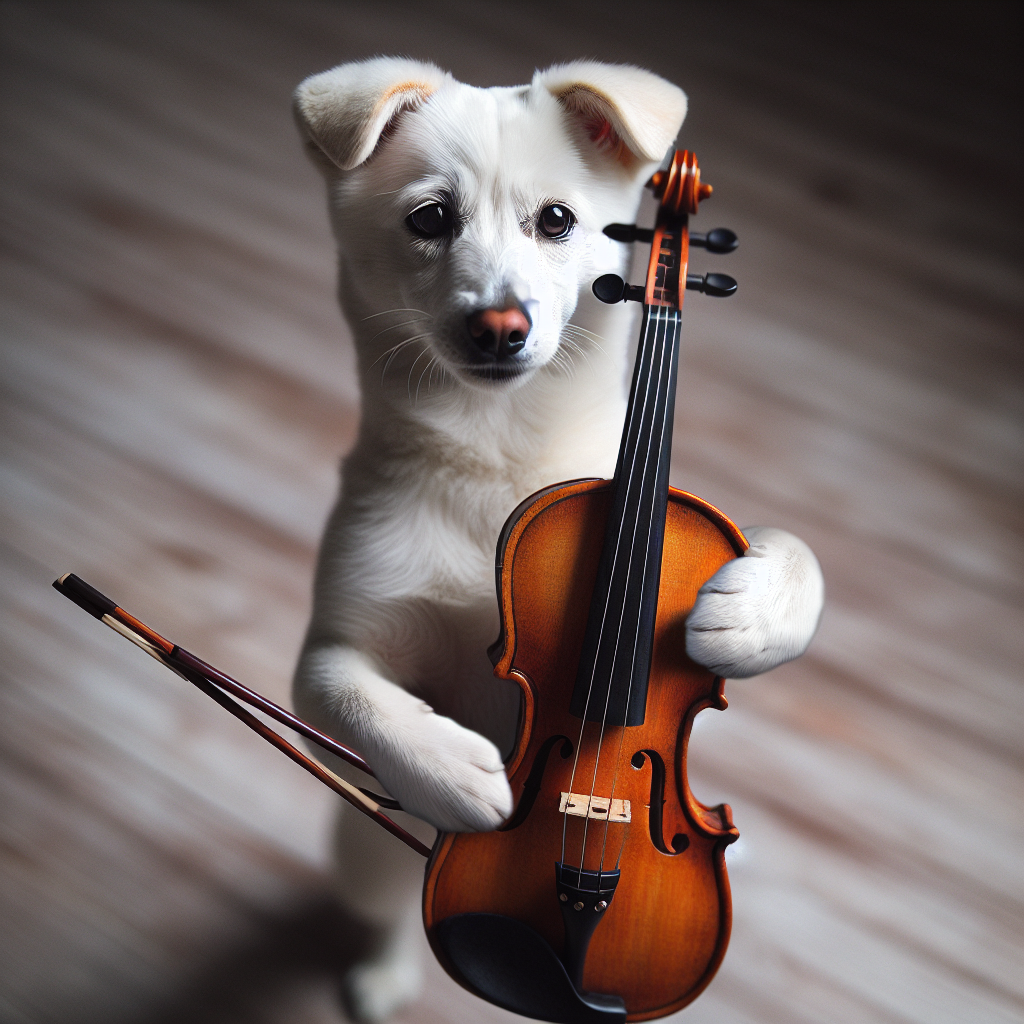

In [3]:

import requests
from PIL import Image

response = requests.get(image_url)

# save image to file    
with open(file_name, 'wb') as f:
    f.write(response.content)

# open image
image:Image = Image.open(file_name)
image.show()


## Edits (DALL·E 2 only)

Also known as "inpainting", the image edits endpoint allows you to edit or extend an image by uploading an image and mask indicating which areas should be replaced. The transparent areas of the mask indicate where the image should be edited, and the prompt should describe the full new image, not just the erased area. This endpoint can enable experiences like the editor in our DALL·E preview app.

In [4]:
image = open("background_image.png", "rb")
mask = open("masked.png", "rb")

response = client.images.edit(
    model="dall-e-2",
    image=image,
    mask=mask,
    prompt="A sunny day with a hunter and his dog",
    size="512x512",
    n=1,
)
print(response)
image_url = response.data[0].url
print(image_url)

ImagesResponse(created=1752077550, background=None, data=[Image(b64_json=None, revised_prompt=None, url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-8wCsPVtFXXzbjLhMN4iOM3nw/user-7rxSAVZ9rGGFwvm2pvbI6v40/img-mdksrZmYfounfvf9OVEQR3Hw.png?st=2025-07-09T15%3A12%3A30Z&se=2025-07-09T17%3A12%3A30Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=475fd488-6c59-44a5-9aa9-31c4db451bea&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-07-09T14%3A18%3A23Z&ske=2025-07-10T14%3A18%3A23Z&sks=b&skv=2024-08-04&sig=QqOiDLoD762%2BaaynC3%2BYprDP//T8r4Bhauc4HiEI4lA%3D')], output_format=None, quality=None, size=None, usage=None)
https://oaidalleapiprodscus.blob.core.windows.net/private/org-8wCsPVtFXXzbjLhMN4iOM3nw/user-7rxSAVZ9rGGFwvm2pvbI6v40/img-mdksrZmYfounfvf9OVEQR3Hw.png?st=2025-07-09T15%3A12%3A30Z&se=2025-07-09T17%3A12%3A30Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=475fd488-6c59-44a5-9aa9-31c4db451bea&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-07-09

## Variation (DALL-E 2 Only)
The image variations endpoint allows you to generate a variation of a given image.

In [5]:
response = client.images.create_variation(
  image=open("image.png", "rb"),
  n=2,
  size="1024x1024"
)

image_url = response.data[0].url

In [6]:
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-8wCsPVtFXXzbjLhMN4iOM3nw/user-7rxSAVZ9rGGFwvm2pvbI6v40/img-OCnTWgqt88VAW8EuyWUKyGWu.png?st=2025-07-09T15%3A14%3A27Z&se=2025-07-09T17%3A14%3A27Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-07-09T16%3A14%3A26Z&ske=2025-07-10T16%3A14%3A26Z&sks=b&skv=2024-08-04&sig=uhk0c0Jvk5FVt6iZknOAT/vkl%2BYBzBAyFaXTfx9EDk8%3D'